In [11]:
from google.colab import files
uploaded = files.upload()


Saving archive (2).zip to archive (2).zip


In [12]:
import zipfile
import io

# jo file upload ki hai usko extract karo
with zipfile.ZipFile(io.BytesIO(uploaded['archive (2).zip']), 'r') as zip_ref:
    zip_ref.extractall("credit_data")


In [13]:
import os

# folder ke andar ki sari files dekho
print(os.listdir("credit_data"))


['CC GENERAL.csv']


In [15]:
import pandas as pd

# jo naam Step 3 me mila tha usko use karo
df = pd.read_csv("credit_data/CC GENERAL.csv")

# Pehle 5 rows dekho
print(df.head())

# Info check karo
print(df.info())


  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [16]:
# Missing values check
print(df.isnull().sum())

# Stats summary
print(df.describe())


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136

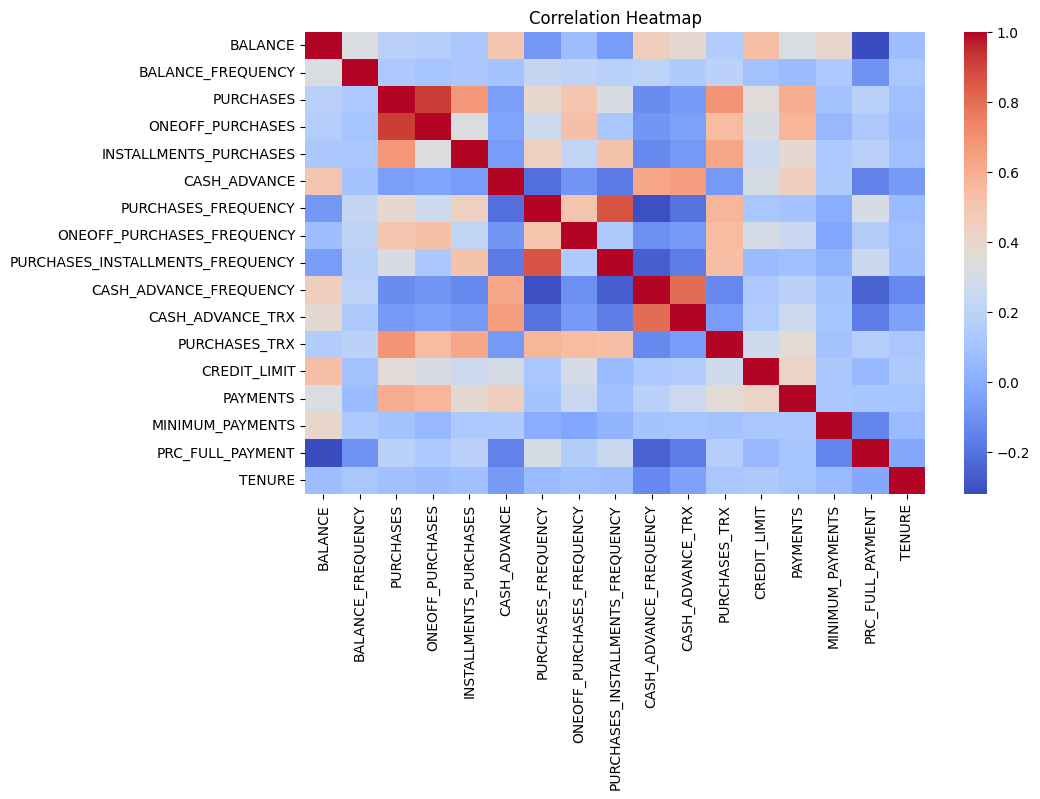

In [18]:
# Sirf numeric columns select kar lo
df_num = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_num.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


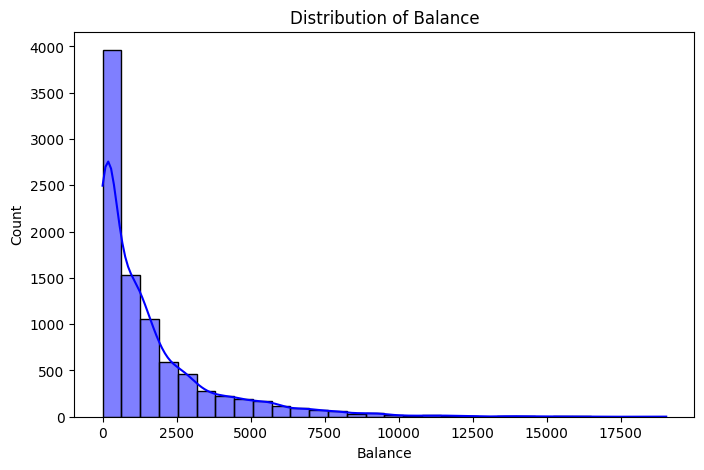

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df["BALANCE"], bins=30, kde=True, color="blue")
plt.title("Distribution of Balance")
plt.xlabel("Balance")
plt.ylabel("Count")
plt.show()


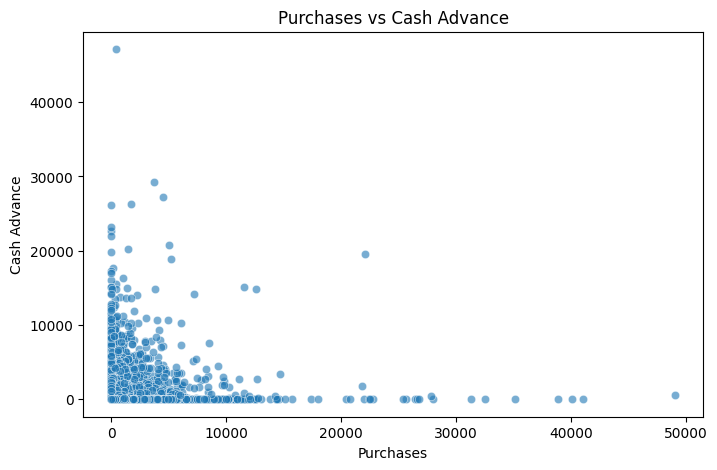

In [20]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="PURCHASES", y="CASH_ADVANCE", data=df, alpha=0.6)
plt.title("Purchases vs Cash Advance")
plt.xlabel("Purchases")
plt.ylabel("Cash Advance")
plt.show()


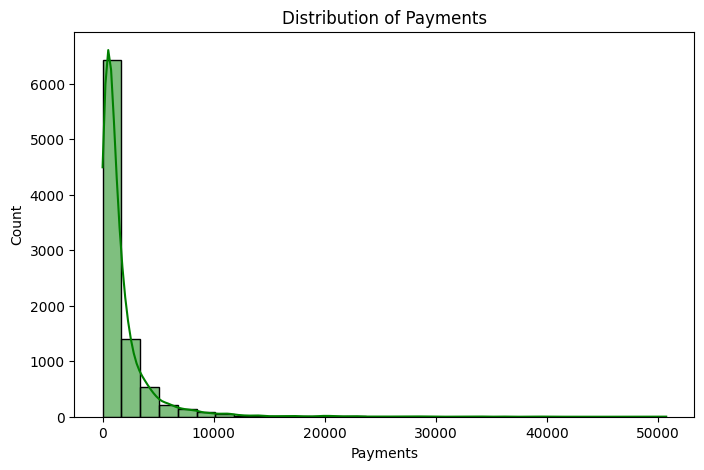

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df["PAYMENTS"], bins=30, kde=True, color="green")
plt.title("Distribution of Payments")
plt.xlabel("Payments")
plt.ylabel("Count")
plt.show()


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans

# Step 1: Select features (numeric columns only)
X = df.select_dtypes(include=['float64', 'int64']).dropna(axis=1)

# --- Option A: If target exists ---
# Replace 'Target' with your actual target column name
if 'Target' in df.columns:
    y = df['Target']

# --- Option B: If you want to create clusters as target ---
else:
    n_clusters = 3  # change according to your data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['Cluster'] = kmeans.fit_predict(X)
    y = df['Cluster']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 5: Predictions
y_pred = model.predict(X_test)

# Step 6: Accuracy & Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9836126629422719

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       460
           1       0.99      0.99      0.99      2187
           2       1.00      0.76      0.87        38

    accuracy                           0.98      2685
   macro avg       0.98      0.90      0.94      2685
weighted avg       0.98      0.98      0.98      2685

